<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/CNN-Lung-Cancer-/blob/main/Lung_Cancer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Lung_and_Colon_Cancer.zip"
extract_path = "/content/lung_cancer_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [31]:
!pip install tensorflow numpy matplotlib


In [32]:
import os

# Checked the directory structure of the extracted dataset
dataset_path = '/content/lung_cancer_dataset'
os.listdir(dataset_path)


['organized', 'lung_colon_image_set']

In [33]:
# List contents of the 'organised' directory
organized_path = os.path.join(dataset_path, 'organized')
print("Contents of 'organized':", os.listdir(organized_path))

# List contents of the 'lung_colon_image_set' directory
lung_colon_image_set_path = os.path.join(dataset_path, 'lung_colon_image_set')
print("Contents of 'lung_colon_image_set':", os.listdir(lung_colon_image_set_path))


Contents of 'organized': ['malignant', 'benign']
Contents of 'lung_colon_image_set': ['lung_image_sets', 'colon_image_sets']


In [34]:
# List the contents of 'lung_image_sets' to see the class directories
lung_image_sets_path = os.path.join(lung_colon_image_set_path, 'lung_image_sets')
print("Contents of 'lung_image_sets':", os.listdir(lung_image_sets_path))


Contents of 'lung_image_sets': ['lung_aca', 'lung_scc', 'lung_n']


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions
img_height, img_width = 224, 224

# Image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zooms
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Filling pixels after transformations
)

# Image normalisation for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Define paths for the training and validation data
train_dir = lung_image_sets_path
validation_dir = lung_image_sets_path

# Created train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse',  # Use sparse labels for integer encoding
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse'
)


Found 15000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.


In [36]:
from tensorflow.keras import layers, models

# Defined the CNN model
model = models.Sequential()

# Added convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))  # Adjust input shape
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattened the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer for regularization
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compiled the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Summarised the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2185s 5s/step - accuracy: 0.8840 - loss: 0.2935 - val_accuracy: 0.9189 - val_loss: 0.1992
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2179s 5s/step - accuracy: 0.8859 - loss: 0.2873 - val_accuracy: 0.9166 - val_loss: 0.1994
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2169s 5s/step - accuracy: 0.8989 - loss: 0.2537 - val_accuracy: 0.9401 - val_loss: 0.1694
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2165s 5s/step - accuracy: 0.9028 - loss: 0.2406 - val_accuracy: 0.9423 - val_loss: 0.1624
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2164s 5s/step - accuracy: 0.9074 - loss: 0.2288 - val_accuracy: 0.9219 - val_loss: 0.2034


In [46]:
# Access training and validation metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the metrics for each epoch
for epoch in range(len(train_accuracy)):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Accuracy: {train_accuracy[epoch] * 100:.2f}%")
    print(f"  Validation Accuracy: {val_accuracy[epoch] * 100:.2f}%")
    print(f"  Training Loss: {train_loss[epoch]:.4f}")
    print(f"  Validation Loss: {val_loss[epoch]:.4f}")

Epoch 1:
  Training Accuracy: 88.75%
  Validation Accuracy: 91.89%
  Training Loss: 0.2832
  Validation Loss: 0.1992
Epoch 2:
  Training Accuracy: 88.61%
  Validation Accuracy: 91.66%
  Training Loss: 0.2825
  Validation Loss: 0.1994
Epoch 3:
  Training Accuracy: 90.54%
  Validation Accuracy: 94.01%
  Training Loss: 0.2407
  Validation Loss: 0.1694
Epoch 4:
  Training Accuracy: 90.59%
  Validation Accuracy: 94.23%
  Training Loss: 0.2336
  Validation Loss: 0.1624
Epoch 5:
  Training Accuracy: 90.95%
  Validation Accuracy: 92.19%
  Training Loss: 0.2237
  Validation Loss: 0.2034


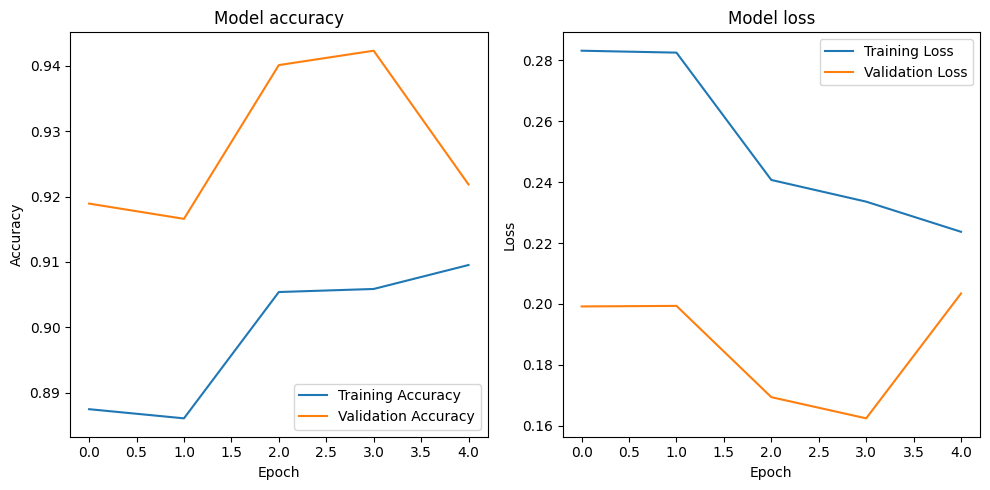

In [47]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

In [40]:
# Evaluated the model's performance on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


469/469 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.9178 - loss: 0.2063
Validation Accuracy: 92.19%


In [41]:
# Saved the trained model
model.save('/content/lung_tissue_classifier.h5')


In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Loaded an image for prediction
img_path = 'lungscc.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(img_height, img_width))

# Converted the image to an array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale the image

# Made a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# The result
class_labels = ['Lung benign tissue', 'Lung adenocarcinoma', 'Lung squamous cell carcinoma']
print(f'Predicted class: {class_labels[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted class: Lung squamous cell carcinoma
